In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk import word_tokenize
import boto3
from s3 import get_file
import re
import mglearn
import sklearn
import yellowbrick
from nltk.corpus import stopwords

In [2]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [3]:
s3 = boto3.resource('s3')
#lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='0320_2020_nlp.csv')

audiofeatures = get_file(s3,'s3ssp',download_file='Analysis_Data/master_audiofeatures_track_uri.csv',rename_file='audiofeatures_0516_2020_nlp.csv')

In [4]:
df = pd.read_csv(audiofeatures,sep='|',encoding='utf-8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b2fe750>,
      dtype=object)

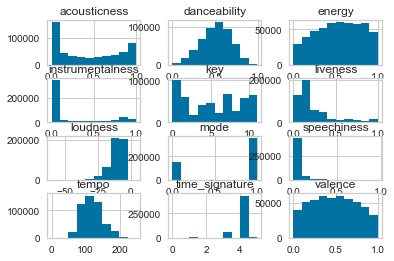

In [5]:
df.hist()

In [6]:
df_playlist = df.copy()
df_playlist = df_playlist[(df_playlist['instrumentalness']<=.95)]
df_playlist.head()
df_playlist.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000
mean,0.513687,0.538558,5.198752,-10.729865,0.702182,0.077887,0.428016,0.203583,0.240643,0.488803,118.764158,3.854332
std,0.170814,0.264619,3.522258,5.406123,0.457300,0.116084,0.361531,0.329383,0.227843,0.263345,30.161797,0.507003
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396000,0.326000,2.000000,-13.314000,0.000000,0.033600,0.052400,0.000005,0.099700,0.271000,96.064000,4.000000
50%,0.522000,0.549000,5.000000,-9.629000,1.000000,0.042800,0.375000,0.001750,0.137000,0.487000,117.646000,4.000000
75%,0.637000,0.761000,8.000000,-6.886000,1.000000,0.066500,0.793000,0.318000,0.299000,0.704000,137.009000,4.000000
max,0.991000,1.000000,11.000000,4.246000,1.000000,0.969000,0.996000,0.950000,1.000000,1.000000,247.961000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d2a8250>,
      dtype=object)

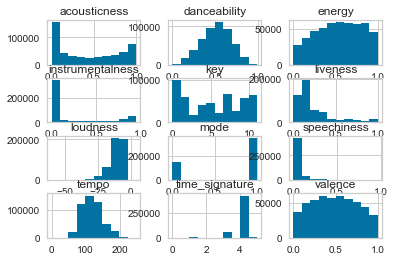

In [7]:
df_playlist.hist()

In [8]:
#Append to Pandas
numpy_train_dataset = np.empty(0, dtype=object, order='C')

In [9]:
%%time
df_ideal_playlist = df_playlist
train = round(501333 * .8)

#Break into chunks
import random
i = 0
master_ideal_track_audiofeatures=[]


#Convert df into numpy
list_track_uri = df_ideal_playlist['track_uri'].to_numpy(dtype=object, copy=True)




#Cycle - is how many times around the loop
cycle = train

#test = 1000
for x in range(train):
    #Split list_track_uri into chunks by cycle amount
    numpy_ideal_playlist = np.random.choice(list_track_uri, size=(20), replace=False)
    for track in numpy_ideal_playlist:
        master_ideal_track_audiofeatures.append({'playlist':f'playlist{x}','track_uri':track})

CPU times: user 1h 12min 19s, sys: 3min 18s, total: 1h 15min 38s
Wall time: 1h 16min 31s


In [10]:
df_only_tracks = pd.DataFrame(master_ideal_track_audiofeatures)#.drop_duplicates([0]).describe()

In [11]:
df_merge_training = df_only_tracks.merge(df,left_on='track_uri',right_on='track_uri')

In [21]:
df_merge_training.to_csv('training_dataset.csv',sep='|',index=False)

In [18]:
df_merge_training.head()

,playlist,track_uri,artist_uri,artist_name,album_uri,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,playlist0,6vQcUyoeJhDfFf1AGnVeAQ,2KSj2QZF42ffJv8uLJk3uU,Unitopia,0guwr3xFVEPeAQ0G4fHOZQ,Cool Air,0.55,0.544,4,-8.82,1,0.0374,0.0447,0.0004,0.131,0.128,120.162,4
1,playlist1523,6vQcUyoeJhDfFf1AGnVeAQ,2KSj2QZF42ffJv8uLJk3uU,Unitopia,0guwr3xFVEPeAQ0G4fHOZQ,Cool Air,0.55,0.544,4,-8.82,1,0.0374,0.0447,0.0004,0.131,0.128,120.162,4
2,playlist33851,6vQcUyoeJhDfFf1AGnVeAQ,2KSj2QZF42ffJv8uLJk3uU,Unitopia,0guwr3xFVEPeAQ0G4fHOZQ,Cool Air,0.55,0.544,4,-8.82,1,0.0374,0.0447,0.0004,0.131,0.128,120.162,4
3,playlist45846,6vQcUyoeJhDfFf1AGnVeAQ,2KSj2QZF42ffJv8uLJk3uU,Unitopia,0guwr3xFVEPeAQ0G4fHOZQ,Cool Air,0.55,0.544,4,-8.82,1,0.0374,0.0447,0.0004,0.131,0.128,120.162,4
4,playlist48953,6vQcUyoeJhDfFf1AGnVeAQ,2KSj2QZF42ffJv8uLJk3uU,Unitopia,0guwr3xFVEPeAQ0G4fHOZQ,Cool Air,0.55,0.544,4,-8.82,1,0.0374,0.0447,0.0004,0.131,0.128,120.162,4


In [13]:
df_agg_training = df_merge_training.groupby('playlist').median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e2cef10>,
      dtype=object)

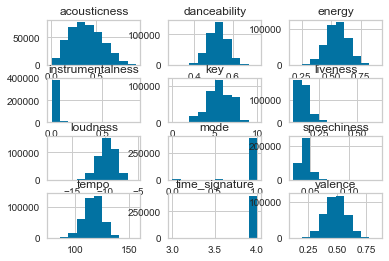

In [14]:
df_agg_training.hist()

## Valence:  (x >= .50 => 176965) ,  (x >= .52  =>  142684), (x >= .60 => 41709)
## Energy:  (x >= .50 => 143239)  , (x >= .60  =>  66969) ,    (x >= .70 => 11272)
## Dance:    (x >= .50 => 115251) ,  (x >= .55  =>  23194) , (x >= .60 => 357)
## Acoustic:  (x >= .10 => 110334) ,  (x >= .20  =>  15501) ,  (x >= .30 => 72)

In [15]:
#   7% of data = Ideal mark up Moderate-High on Valence, Moderate-High on Energy, Low on Dance, Low on Acoustic

df_training = df_agg_training[(df_agg_training['valence']>=.55) & (df_agg_training['energy']>=.60) 
                              & (df_agg_training['danceability']>=.50) & (df_agg_training['acousticness']>=.10)
                             ]

In [1]:
df_training.head()

NameError: name 'df_training' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a2d40d0>,
      dtype=object)

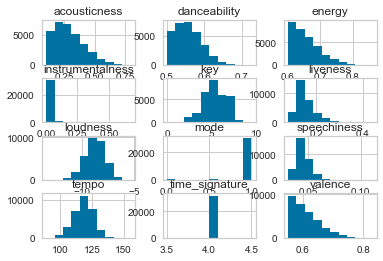

In [17]:
df_training.hist()

In [22]:
df_training.to_csv('Data/good_playlist_dataset.csv',sep='|',index=False)